<a href="https://colab.research.google.com/github/Immaczx/Dash_whit_plotly/blob/main/Ejemplo_Dashboard_Dash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar dash



In [88]:
pip install jupyter-dash -q

In [89]:
pip install dash-cytoscape -q

In [90]:
! pip install pyngrok

## Importar librerías

In [91]:
from jupyter_dash import JupyterDash  # pip install dash
import dash_cytoscape as cyto  # pip install dash-cytoscape==0.2.0 or higher
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Output, Input
import pandas as pd  # pip install pandas
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import math
import datetime
from dash import no_update
import base64
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")
import dash
from plotly.subplots import make_subplots

# Configurar Nkrok

In [92]:
import requests
# download ngrok first
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -q
!unzip -q ngrok-stable-linux-amd64.zip

replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [151]:
get_ipython().system_raw('./ngrok http 8050 &')
# check public url
import time
time.sleep(3)
r = requests.get('http://localhost:4040/api/tunnels')
urls = r.json()['tunnels'][0]['public_url']

In [152]:
urls

'https://565a-34-125-53-42.ngrok.io'

# Ejemplo de montar dash con potly trabajo anterior Codiv19

Configurar Style

In [153]:
!git clone https://github.com/cmosquerat/style assets

fatal: destination path 'assets' already exists and is not an empty directory.


In [154]:
#descargar datos covid
!pip install wget
import wget
import pandas as pd
#dato CSSEGISandData
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
#datos covid19 - mundo
#url = "https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_covid19_confirmed_global.csv&filename=time_series_covid19_confirmed_global.csv"
#datos Colombia
#url = "https://www.datos.gov.co/api/views/gt2j-8ykr/rows.csv?accessType=DOWNLOAD"
Xd = pd.read_csv(url)
#wget.download(url, 'covid.csv')
#Xd = pd.read_csv('covid.csv')


In [155]:
Xd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323,156363,156392,156397,156397,156397,156397,156414,156456,156487,156510,156552,156610,156649,156739
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793,187363,187994,187994,189125,189355,190125,190815,191440,192013,192600,193075,193269,193856,194472
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754,206878,206995,207079,207156,207254,207385,207509,207624,207764,207873,207970,208104,208245,208380
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572,15618,15618,15618,15618,15705,15717,15744,15744,15819,15819,15819,15907,15929,15972
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533,64583,64612,64654,64674,64724,64762,64815,64857,64875,64899,64913,64913,64940,64968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463,946043,953547,961038,968684,976672,984805,992735,1000897,1009879,1018346,1026522,1035138,1045397,1055246
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509,454799,455099,455099,455099,455689,455949,456186,456407,456632,456632,456632,457154,457390,457477
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810,9831,9843,9858,9870,9883,9891,9902,9907,9912,9918,9918,9936,993

In [156]:
# Grafico Georeferencia
C=Xd.columns[4:]
fig = px.scatter_geo(Xd, lat="Lat", lon="Long", hover_name="Country/Region", size=C[400], projection="natural earth")
#animation_frame="Country/Region"
# size="3/5/21"
fig.show()

In [157]:
# prosesamiento de datos
confirmed_df = Xd.copy()
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()
world_cases = []
for i in dates:
    confirmed_sum = confirmed[i].sum()
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)

def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases)
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-days_in_future]

start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

future_forcast_dates = np.array(future_forcast_dates).reshape(-1)


In [158]:
# Split datos
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.05, shuffle=False)
# Modelo SVM
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)



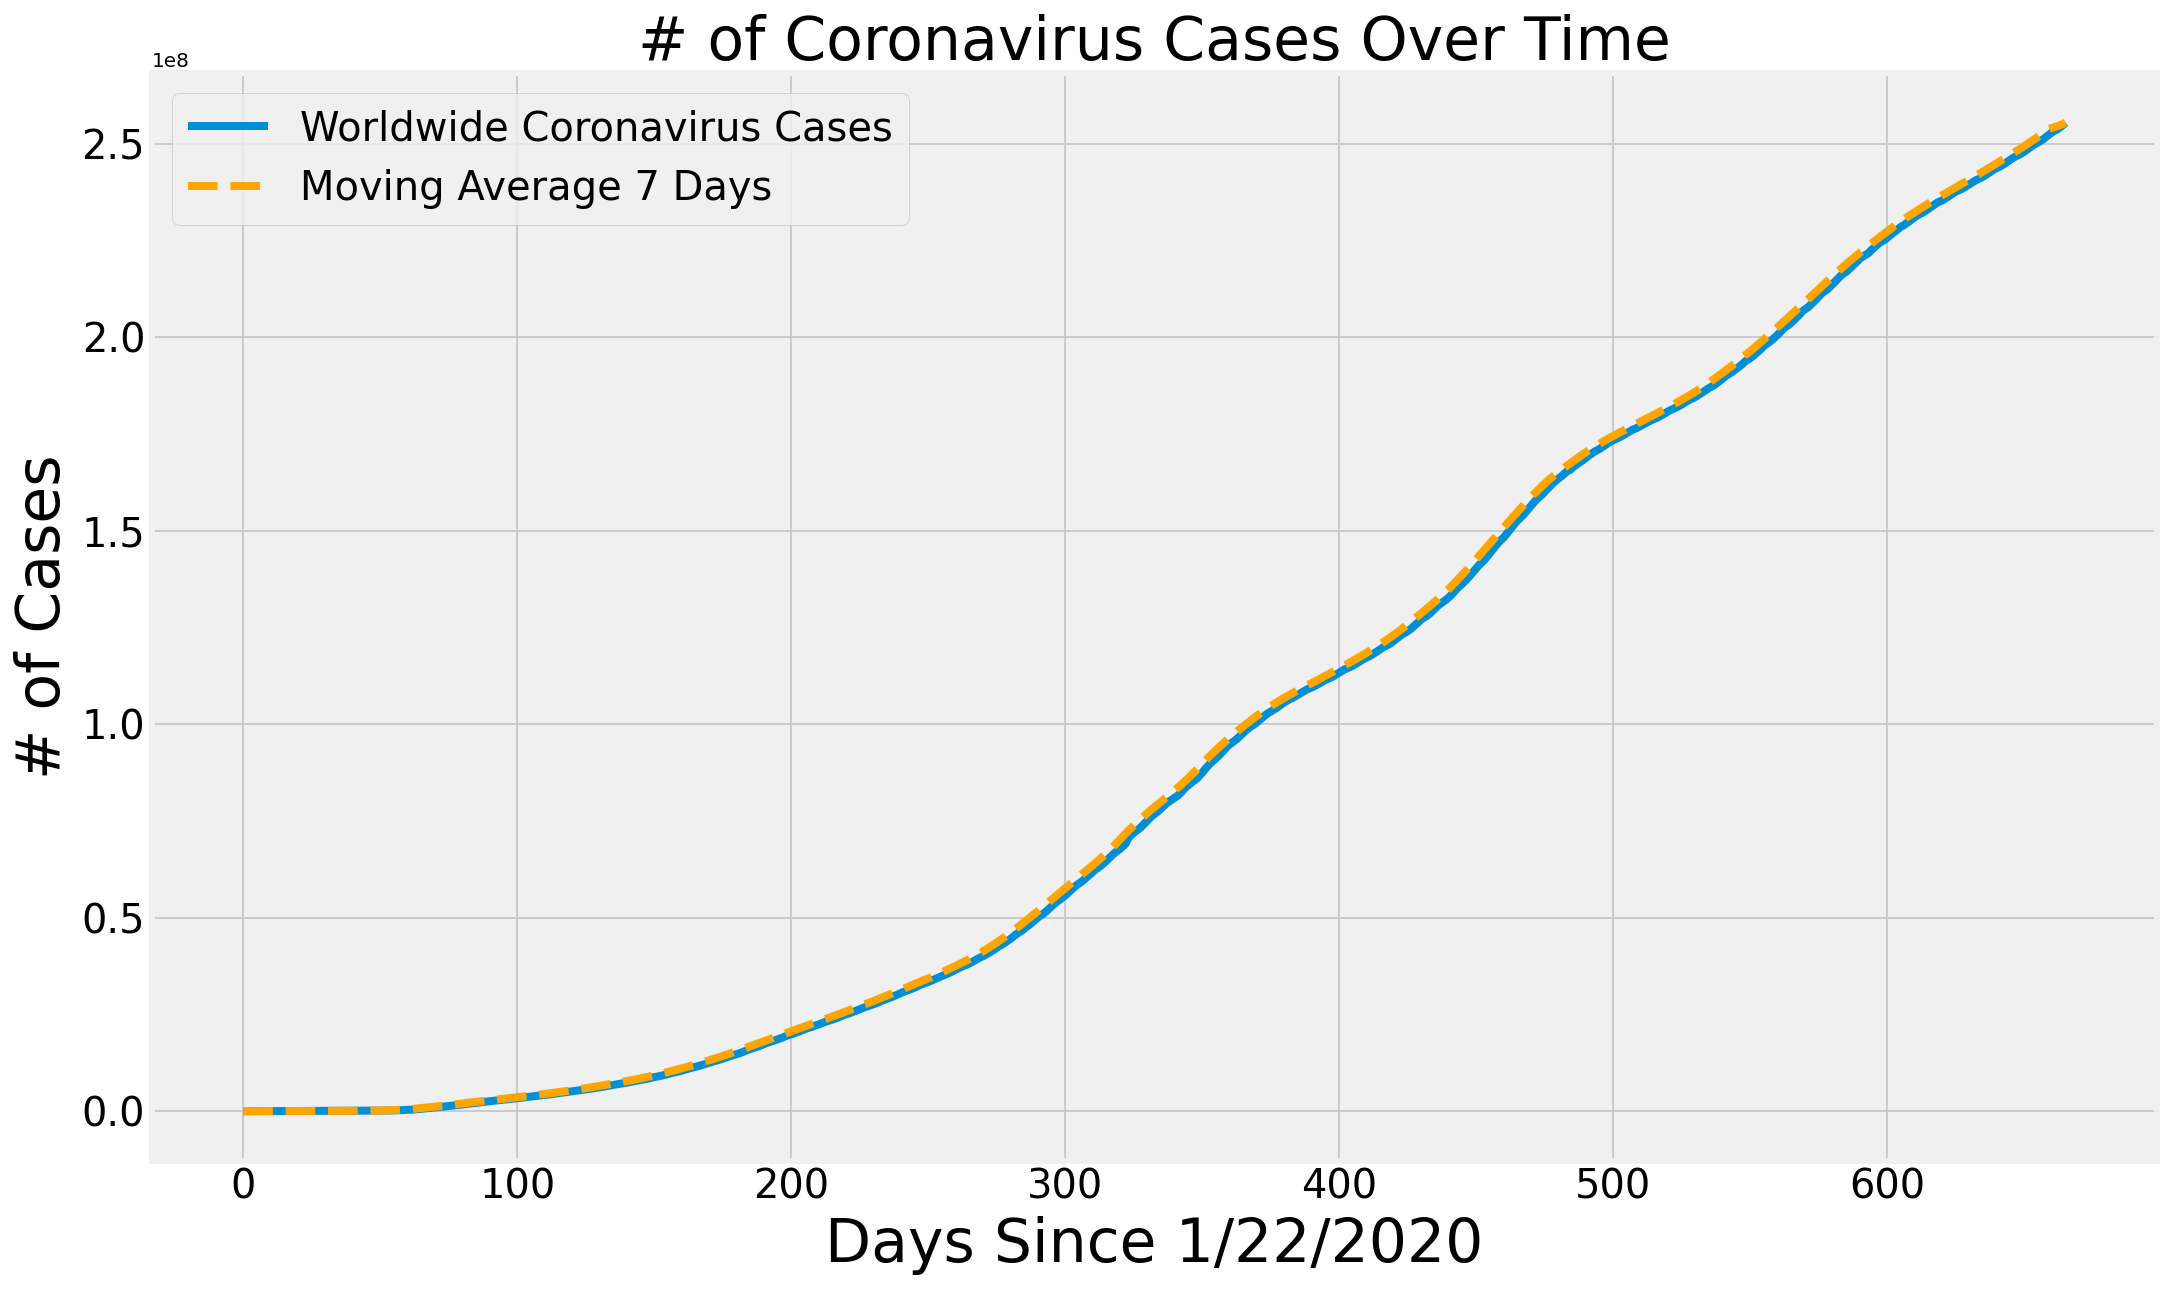

In [159]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
#  figure of Coronavirus Cases Over Time plt
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

xaxis_type = 'linear'
#  figure of Coronavirus Cases Over Time go
fig_0 = go.Figure()
fig_0.add_trace(go.Scatter(x=adjusted_dates, y=world_cases, name='Casos Mundiales'))
fig_0.add_trace(go.Scatter(x=adjusted_dates, y= world_confirmed_avg, name='Media de 7 días'.format(window), line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_0.update_layout(title_text='Casos de COVID-19', height=800)
fig_0.update_xaxes(title_text='Días desde 1/22/2020')
fig_0.update_yaxes(title_text='# de casos', type='linear' if xaxis_type == 'linear' else 'log')
fig_0.update_xaxes(rangeslider_visible=True)                 
fig_0.show()

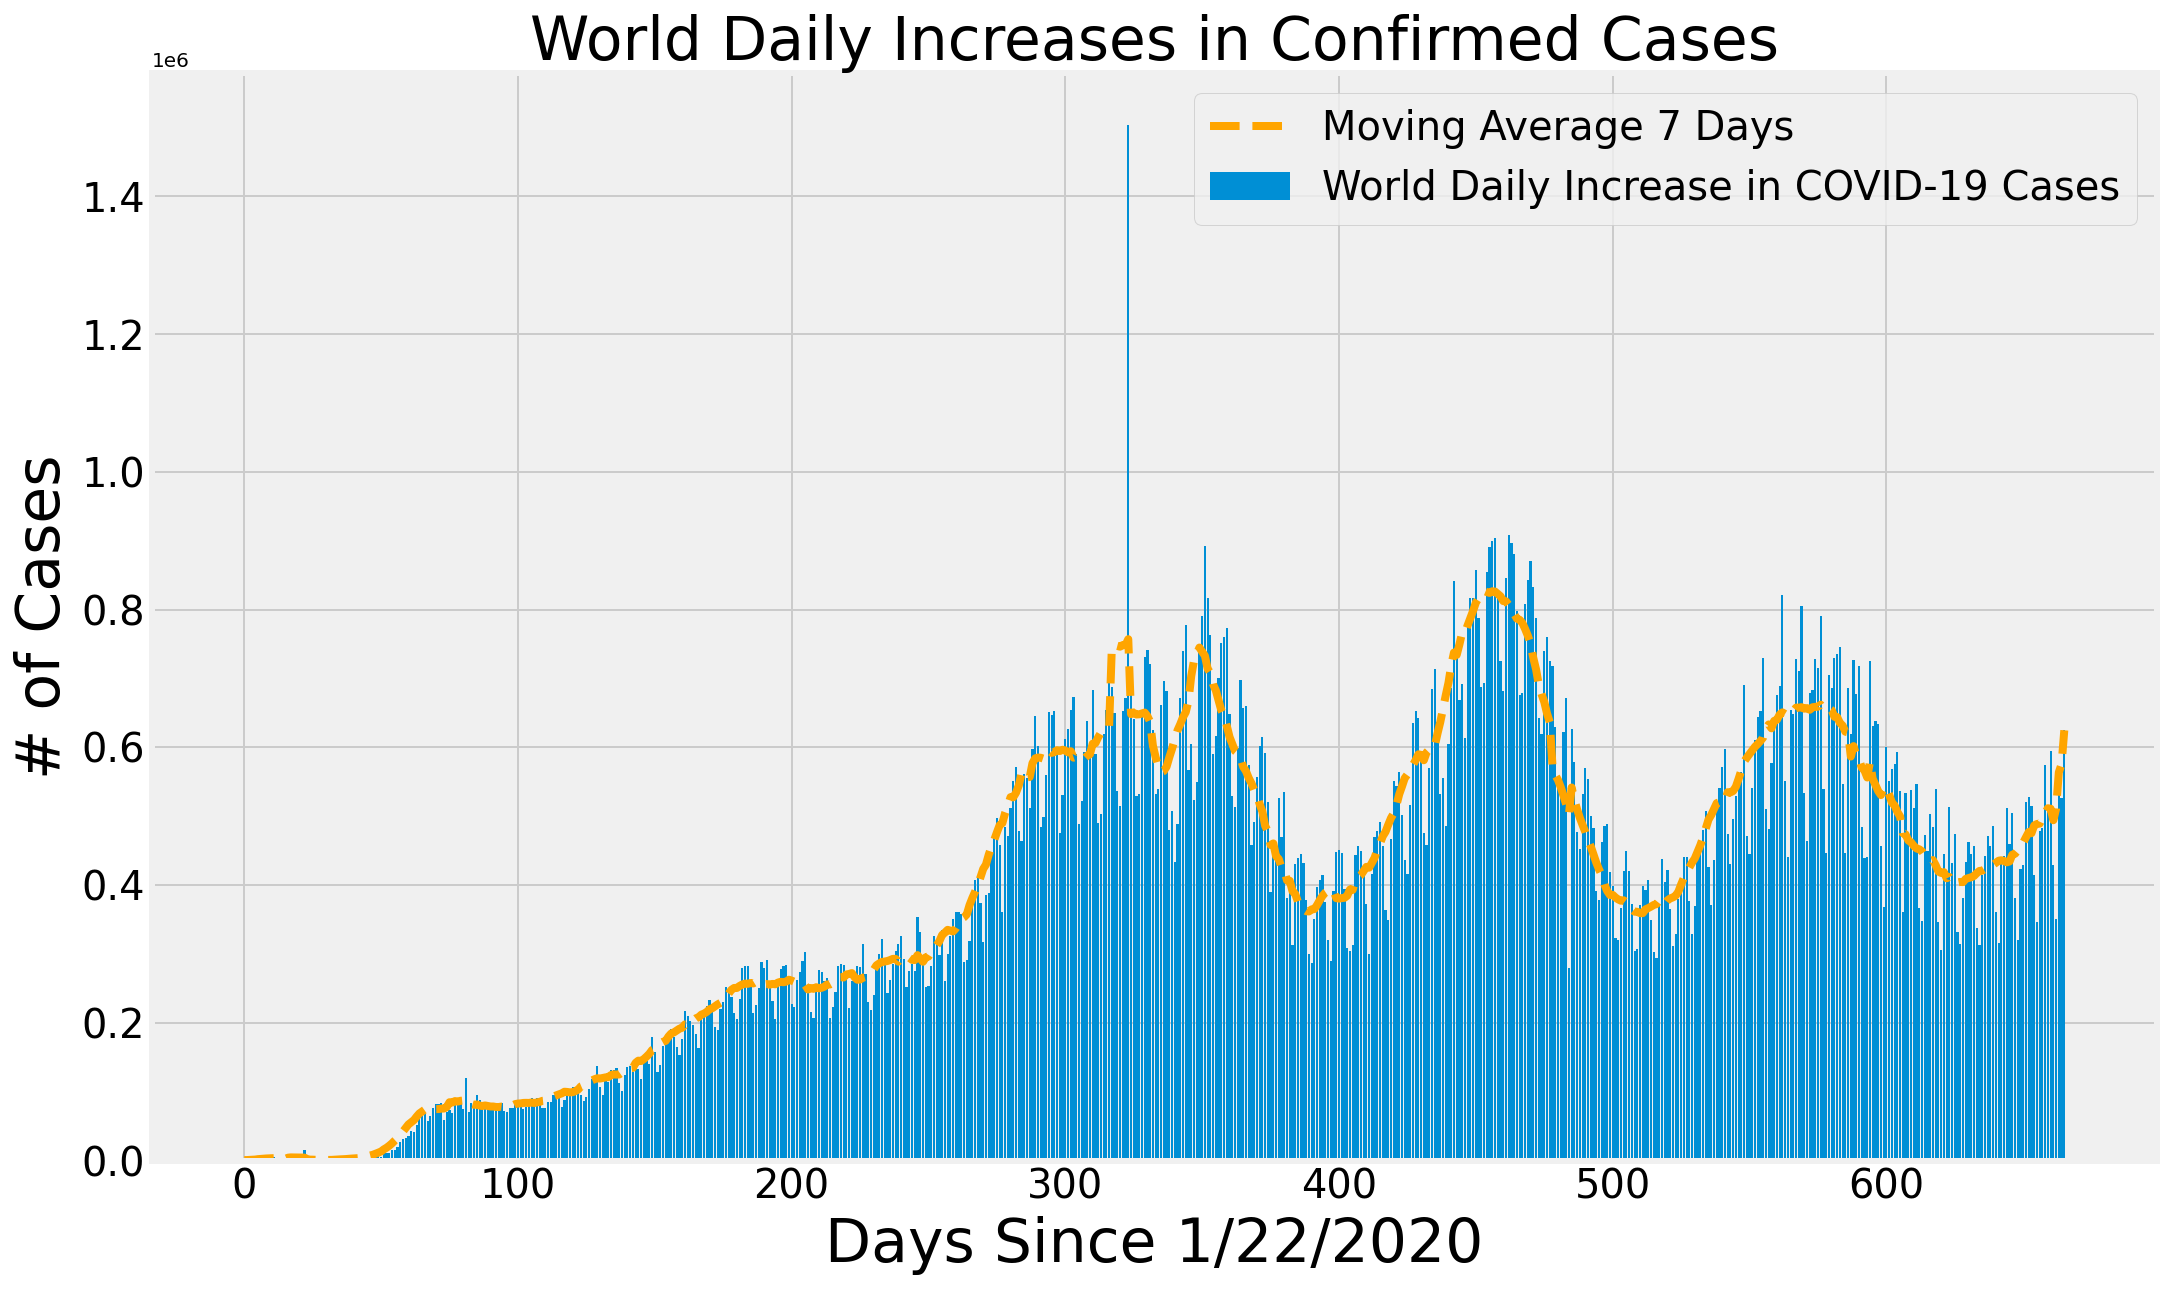

In [160]:
# figure World Daily Increases in Confirmed Cases plt
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# figure World Daily Increases in Confirmed Cases go
fig_1= go.Figure()
trace1 = go.Bar(y=world_daily_increase,name='Incremento díario')
trace2 = go.Scatter(y=world_daily_increase_avg,name='Media de 7 días'.format(window))
fig_1.add_traces([trace1, trace2])
fig_1.update_layout(title_text='Incremento díario de casos de Coronavirus mundial', height=800)
fig_1.update_xaxes(title_text='Days desde 1/22/2020')
fig_1.update_yaxes(title_text='Número de casos')
fig_1.update_xaxes(rangeslider_visible=True)
fig_1.show()

Base de Datos Muertes

In [161]:
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
countries = ['US', 'Russia', 'India', 'Brazil', 'South Africa', 'China', 'Italy',
             'Germany', 'Spain', 'France', 'United Kingdom', 'Peru', 'Mexico', 'Colombia', 'Argentina', 'Saudi Arabia', 'Iran', 'Bangladesh',
            'Pakistan', 'Turkey', 'Philippines', 'Iraq', 'Indonesia', 'Israel', 'Ukraine', 'Ecuador', 'Bolivia', 'Netherlands', 'Belgium', 'Poland', 'Czechia', 'Switzerland',
            'Romania', 'Morocco','Portugal', 'Austria', 'Sweden']

In [162]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21,11/4/21,11/5/21,11/6/21,11/7/21,11/8/21,11/9/21,11/10/21,11/11/21,11/12/21,11/13/21,11/14/21,11/15/21,11/16/21,11/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,7221,7225,7228,7230,7234,7238,7238,7238,7243,7246,7247,7247,7249,7252,7253,7255,7260,7262,7266,7268,7269,7272,7280,7281,7281,7284,7284,7284,7284,7284,7288,7290,7291,7292,7292,7292,7293,7294,7295,7297
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2759,2768,2777,2783,2788,2797,2807,2810,2820,2829,2841,2849,2855,2863,2870,2874,2880,2888,2893,2902,2909,2916,2924,2931,2937,2940,2944,2948,2948,2955,2966,2970,2975,2978,2983,2986,2990,2997,3004,3014
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,5850,5853,5855,5859,5862,5864,5867,5870,5872,5873,5875,5878,5881,5883,5886,5890,5894,5899,5904,5907,5913,5918,5920,5924,5927,5931,5936,5939,5941,5945,5950,5954,5960,5966,5971,5977,5984,5991,5997,6005
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130,130
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1618,1622,1629,1642,1650,1653,1660,1662,1664,1670,1678,1682,1685,1693,1695,1697,1701,1702,1703,1705,1707,1708,1710,1713,1713,1716,1718,1719,1719,1720,1721,1723,1723,1725,1726,1727,1727,1727,1729,1729


In [163]:
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)

country_info = get_country_info("Colombia")
country_cases = country_info[0]
country_deaths = country_info[1]

country_daily_increase = daily_increase(country_cases)
country_daily_death = daily_increase(country_deaths)

confirmed_avg = moving_average(country_cases, window)
confirmed_increase_avg = moving_average(country_daily_increase, window)
death_increase_avg = moving_average(country_daily_death, window)

In [164]:
fig_3= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_cases, line=dict(color='royalblue', width=4), name="Casos confirmados en Colombia"))
fig_3.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4, dash='dash')))
fig_3.update_layout(title_text='Casos confirmados en Colombia', height=800)
fig_3.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_3.update_yaxes(title_text='# de casos')
fig_3.show()

In [165]:
fig_4= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_daily_increase, line=dict(color='royalblue', width=4), name="Casos Confirmados en Colombia (Diariamente)"))
fig_4.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_increase_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_4.update_layout(title_text='Casos diarios en Colombia', height=800)
fig_4.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_4.update_yaxes(title_text='# de casos')
fig_4.show()

In [166]:
fig_5= go.Figure(data=go.Scatter(x=adjusted_dates,y=country_daily_death, line=dict(color='royalblue', width=4), name="Muertes en Colombia (Diariamente)"))
fig_5.add_trace(go.Scatter(x=adjusted_dates, y=death_increase_avg,name="Media de 7 días",
                    line=dict(color='firebrick', width=4,
                              dash='dash')))
fig_5.update_layout(title_text='Muertes en Colombia', height=800)
fig_5.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_5.update_yaxes(title_text='# de casos')
fig_5.show()

In [167]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], country_cases[50:], test_size=0.05, shuffle=False)
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

In [168]:
future_forcast = np.array(future_forcast).reshape(-1)

fig_6= go.Figure(data=go.Scatter(x=future_forcast, y=svm_pred , name="Predicción SVM", line=dict(color='firebrick', width=4, dash='dash')))
fig_6.add_trace(go.Scatter(x=adjusted_dates, y=country_cases, line=dict(color='royalblue', width=4), name="Casos Confirmados en Colombia (Diariamente)"))
fig_6.update_layout(title_text='Predicción SVM Colombia', height=800)
fig_6.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
fig_6.update_yaxes(title_text='# de casos')
fig_6.show()

Nueva base de Datos

In [169]:
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2021.csv')

unique_countries =  list(latest_data['Country_Region'].unique())

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
# country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])


def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    # state_recovery_cases = []
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    #     state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

unique_provinces =  list(latest_data['Province_State'].unique())
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
# province_recovery_cases = []
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
#     province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])


province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
                          'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]],'Number of Active Cases' : [format(int(i), ',d') for i in province_active[:province_limit]], 
                            'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region



In [170]:
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)


visual_unique_provinces = [] 
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])
for i in range(len(province_confirmed_cases[:10])):
    visual_unique_provinces.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])

visual_unique_provinces.append('Others')
visual_confirmed_cases2.append(others)

In [171]:

regions = list(latest_data[latest_data['Country_Region']=="Colombia"]['Province_State'].unique())
confirmed_cases = []
no_cases = [] 
for i in regions:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
      confirmed_cases.append(cases)
    else:
      no_cases.append(i)

    # remove areas with no confirmed cases
for i in no_cases:
    regions.remove(i)

    # only show the top 5 states
regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        

fig_7 = go.Figure(data=[go.Pie(labels=regions, values=confirmed_cases_5, textinfo='label+percent',)])
fig_7.update_layout(title_text='Casos por departamento', height=800)
fig_7.show()



# Mostrar en dash

In [172]:
! wget --no-check-certificate --content-disposition -O logo.png https://i.pinimg.com/originals/98/3d/fb/983dfbcc82b24dd28b2e6dc4aeec7c79.png

--2021-11-19 04:08:03--  https://i.pinimg.com/originals/98/3d/fb/983dfbcc82b24dd28b2e6dc4aeec7c79.png
Resolving i.pinimg.com (i.pinimg.com)... 23.53.252.240, 2600:1406:5400:58c::1931, 2600:1406:5400:5a5::1931, ...
Connecting to i.pinimg.com (i.pinimg.com)|23.53.252.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25876 (25K) [image/png]
Saving to: ‘logo.png’

logo.png            100%[===================>]  25.27K  --.-KB/s    in 0.006s  

2021-11-19 04:08:04 (3.83 MB/s) - ‘logo.png’ saved [25876/25876]



In [173]:


image_filename = 'logo.png' # replace with your own image
encoded_image = base64.b64encode(open(image_filename, 'rb').read())
external_stylesheets = [
    {
        "href": "https://fonts.googleapis.com/css2?"
                "family=Lato:wght@400;700&display=swap",
        "rel": "stylesheet",
    },
]

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.title = "Trabajo de analítica de datos"

app.layout =html.Div(
    children=[
        html.Div(
            children=[
                html.Img(src='data:image/png;base64,{}'.format(encoded_image.decode()),width="333",height="200",className="header-emoji"),
                html.H1(
                    children="Dashboard Covid-19 Colombia", className="header-title"
                ),
                html.P(
                    children=['Universidad Nacional de Colombia', html.Br(), 'cmosquerat, cpelaezg'],
                    className="header-description",
                ),
            ],
            className="header",
        ),

 html.Div(className='eight columns div-for-charts bg-grey',children=[
                    
    dcc.Graph(id='graph-with-slider', 
            config={'displayModeBar': False},
            className="card"),
    dcc.Slider(
            id='year-slider',
            min=0,
            max=len(C),
            value=len(C)-1,
            marks={str(i): str(C[i]) for i in range(0,len(C),30)},
            step=30
    ),
 ]),
html.Div([  
    html.Div(children=[
        dcc.Graph(id='CasesOverTime1',
            config={'displayModeBar': False}),
        dcc.RadioItems(
            id='yaxis-type',
            options=[{'label': i, 'value': i} for i in ['linear', 'log']],
            value='linear')
    ], style={'width': '48%', 'display': 'inline-block'},
       className="card"),
    html.Div(
        dcc.Graph(id='WorldDailyIncreases1',
            config={'displayModeBar': False},
            figure = fig_1,
            className="card"),
            style={'width': '48%', 'float': 'right', 'display': 'inline-block'}
            ),
    html.Div([
        dcc.Dropdown(
            id='crossfilter',
            options=[{'label': i, 'value': i} for i in ['Casos acumulados en Colombia', 'Casos diarios en Colombia', 'Muertes diarias en Colombia']],
            value='Casos acumulados en Colombia'),
            dcc.Graph(id='Colombia_graf',
            config={'displayModeBar': False},
            className="card")
    ]),
    html.Div(
          dcc.Graph(id='WorldDailyIncreases6',
          config={'displayModeBar': False},
          animate=True,
          figure = fig_6,className="card"),
          className ="six columns"
          ),
    
    html.Div(
          dcc.Graph(id='WorldDailyIncreases7',
          config={'displayModeBar': False},
          animate=True,
          figure = fig_7,className="card"),
          className ="six columns"
          ),
     ],
     className="row"         
     )

])


@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('year-slider', 'value'))

def update_figure(selected_year):
    
    fig_geo = px.scatter_geo(Xd, lat="Lat", lon="Long", hover_name="Country/Region", size=C[selected_year], projection="natural earth")

    # fig = px.scatter(filtered_df, x="gdpPercap", y="lifeExp",
    #                  size="pop", color="continent", hover_name="country",
    #                  log_x=True, size_max=55)

    # fig.update_layout(transition_duration=500)

    return fig_geo

@app.callback(
    Output('CasesOverTime1', 'figure'),
    Input('yaxis-type', 'value'))

def update_graph(yaxis_type):
  #  figure of Coronavirus Cases Over Time go
  fig_0 = go.Figure()
  fig_0.add_trace(go.Scatter(x=adjusted_dates, y=world_cases, name='Casos Mundiales'))
  fig_0.add_trace(go.Scatter(x=adjusted_dates, y= world_confirmed_avg, name='Media de 7 días'.format(window), line=dict(color='firebrick', width=4,
                                dash='dash')))
  fig_0.update_layout(title_text='Casos de COVID-19', height=800)
  fig_0.update_xaxes(title_text='Días desde 1/22/2020',rangeslider_visible=True )
  fig_0.update_yaxes(title_text='# de casos', type='linear' if yaxis_type == 'linear' else 'log')

  return fig_0

@app.callback(
    Output('Colombia_graf', 'figure'),
    Input('crossfilter', 'value'))

def update_graph(graf):
  if graf == 'Casos acumulados en Colombia':
    fig_c = go.Figure(data=go.Scatter(x=adjusted_dates, y=country_cases, line=dict(color='royalblue', width=4), name="Casos confirmados en Colombia"))
    fig_c.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_avg, line=dict(color='firebrick', width=4, dash='dash'), name="Media de 7 días"))
  elif graf == 'Casos diarios en Colombia':
    fig_c = go.Figure(data=go.Scatter(x=adjusted_dates, y=country_daily_increase, line=dict(color='royalblue', width=4), name="Casos diarios en Colombia"))
    fig_c.add_trace(go.Scatter(x=adjusted_dates, y=confirmed_increase_avg, line=dict(color='firebrick', width=4, dash='dash'), name="Media de 7 días"))
  elif graf == 'Muertes diarias en Colombia':
    fig_c = go.Figure(data=go.Scatter(x=adjusted_dates, y=country_daily_death, line=dict(color='royalblue', width=4), name="Muertes en Colombia"))
    fig_c.add_trace(go.Scatter(x=adjusted_dates, y=death_increase_avg, line=dict(color='firebrick', width=4, dash='dash'), name="Media de 7 días"))

  fig_c.update_layout(title_text=graf, height=800)
  fig_c.update_xaxes(rangeslider_visible=True,title_text='Días desde 1/22/2020')
  fig_c.update_yaxes(title_text='# de casos')

  return fig_c

app.run_server(mode='inline', port=8050)

<IPython.core.display.Javascript object>

Ir a este link para ver página

In [174]:
urls

'https://565a-34-125-53-42.ngrok.io'